#  Car Details from Car Dekho Linear Regression

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_dataset = pd.read_csv('car data.csv')

# Exploratory Data Analysis

In [3]:
car_dataset.shape

(301, 10)

In [4]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


In [5]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# Checking the missing valuse in the dataset
car_dataset.isnull().sum()

Car_Name         0
company          0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the duplicate values in the dataset
car_dup = car_dataset.duplicated().any()
car_dup

True

In [8]:
# Need to drop the duplicate values fron the dataset 
car = car_dataset.drop_duplicates()
car.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
car.shape

(299, 10)

In [10]:
# cross check on dupliucate values
car_dup = car.duplicated().any()
car_dup

False

In [11]:
# Chicking the distribution of catogrical variablesin the dataset
print(car.Fuel_Type.value_counts())
print(car.Seller_Type.value_counts())
print(car.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [12]:
#Target variable
car.Selling_Price.value_counts()

Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64

<Axes: ylabel='count'>

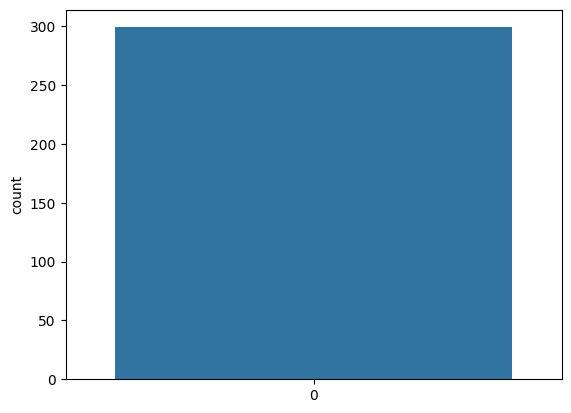

In [13]:
sns.countplot(car['Selling_Price'])

In [14]:
# Encoding the categorical Data (Fuel_Type)
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

# Encoding the categorical Data (Seller_Type)
car.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)

# Encoding the categorical Data (Transmission)
car.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

C:\Users\alikh\AppData\Local\Temp\ipykernel_9468\4023882487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)
C:\Users\alikh\AppData\Local\Temp\ipykernel_9468\4023882487.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)
C:\Users\alikh\AppData\Local\Temp\ipykernel_9468\4023882487.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [15]:
car.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,0,0,0,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,0,0,0,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,1,0,0,0


# Visualizing categorical column with bar plot

<Axes: xlabel='Car_Name', ylabel='Selling_Price'>

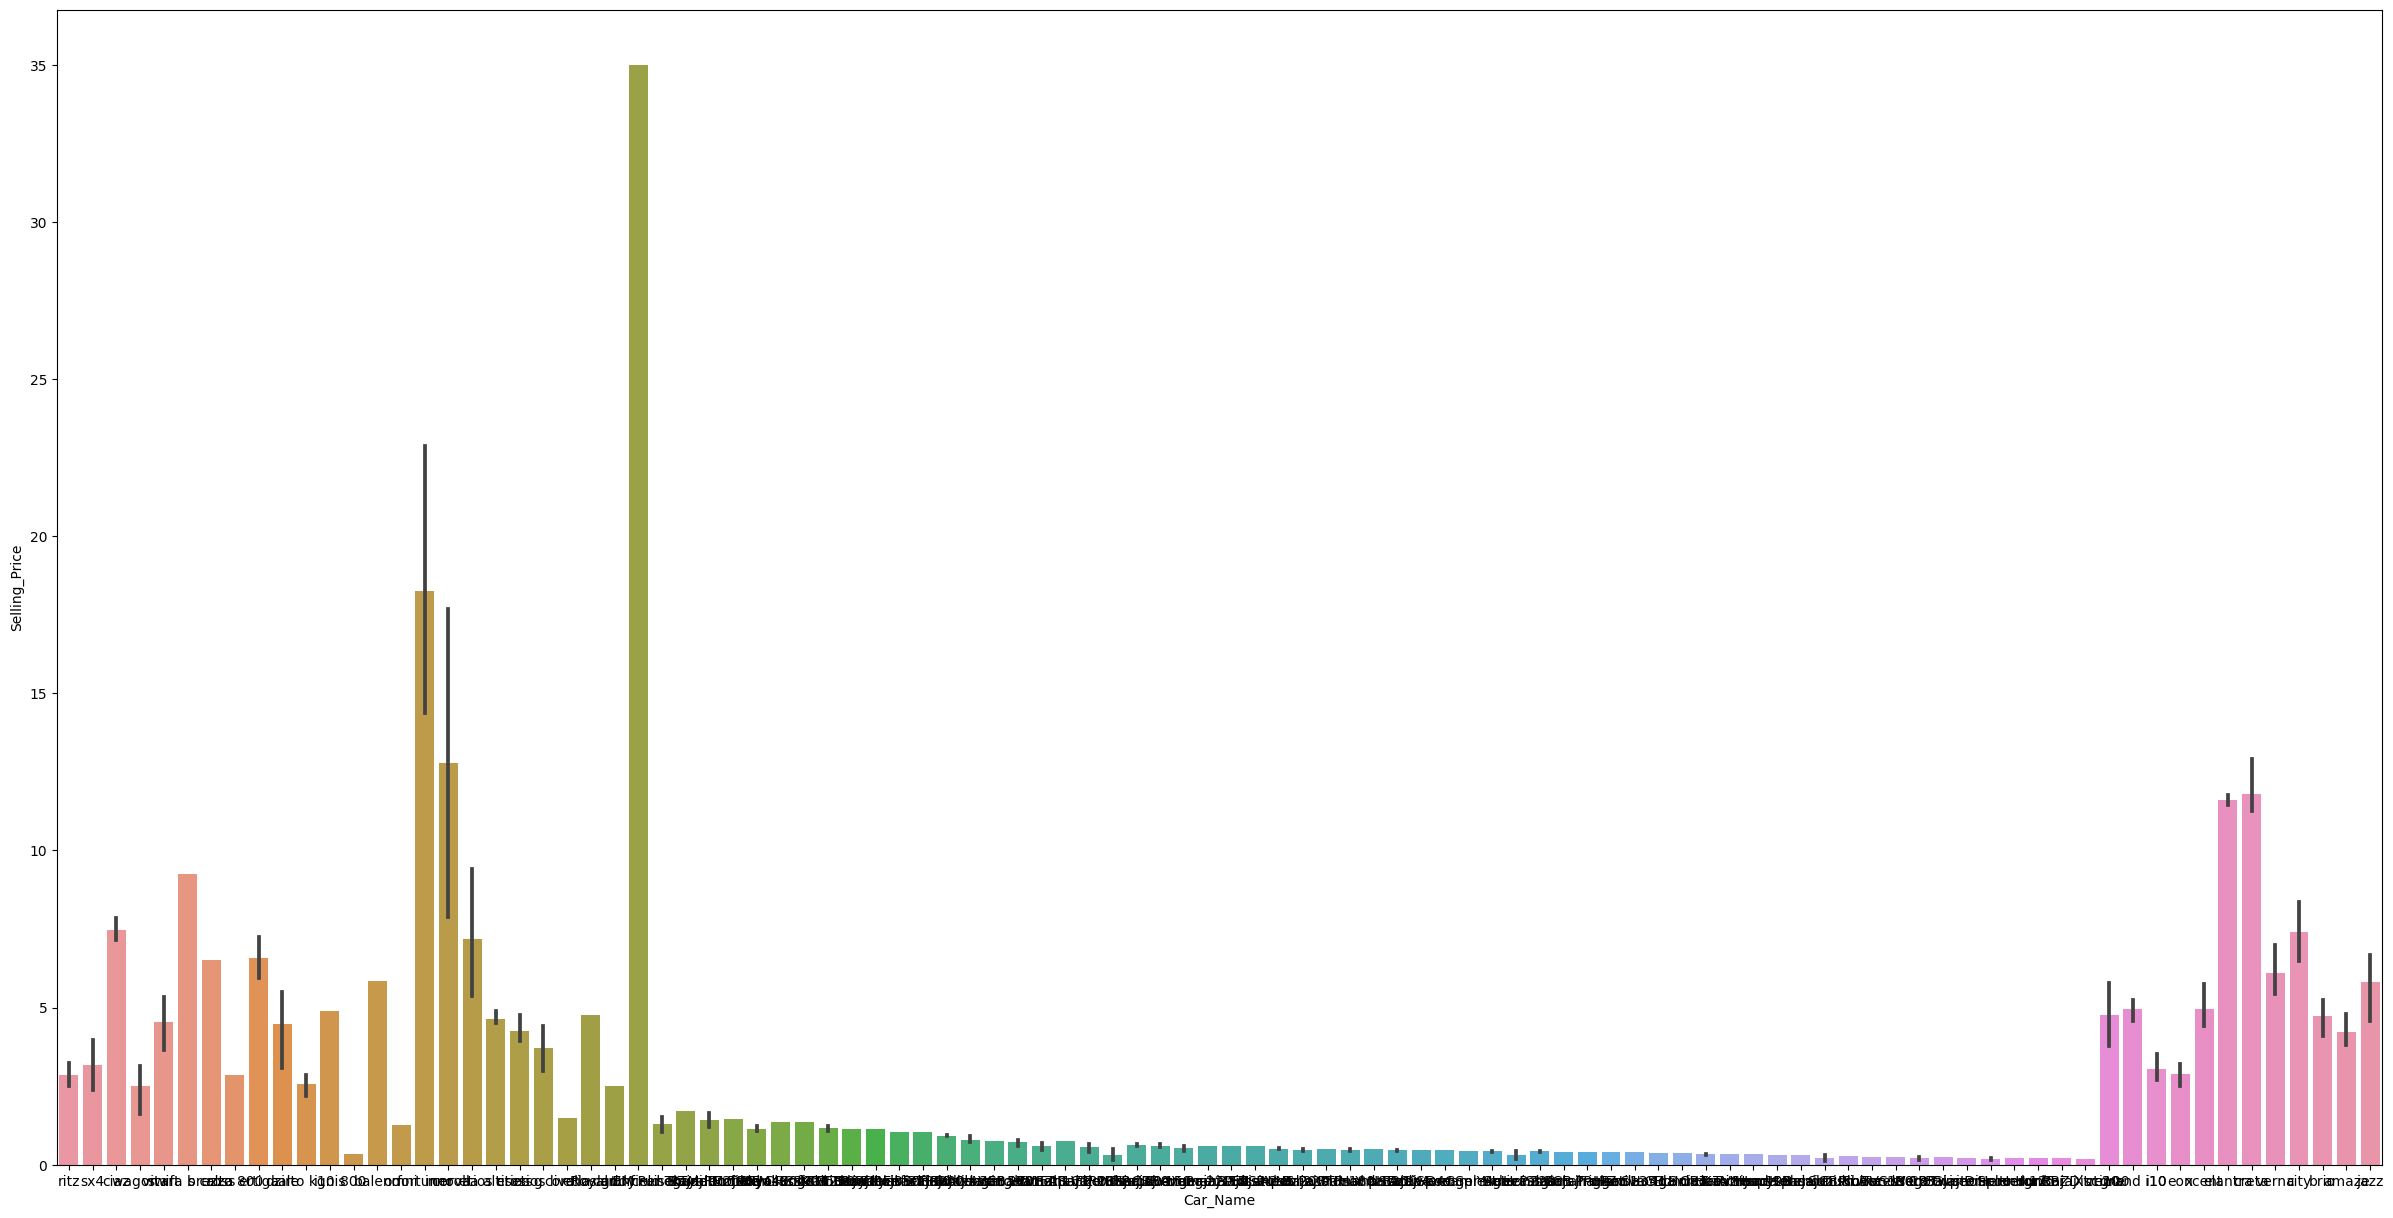

In [16]:
plt.figure(figsize=(30,15))
sns.barplot(x='Car_Name', y='Selling_Price', data=car)

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

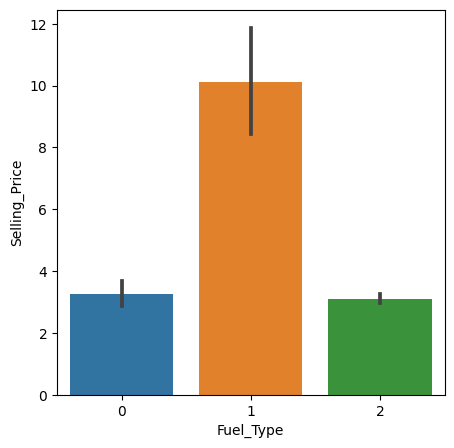

In [17]:
plt.figure(figsize=(5,5))
sns.barplot(x='Fuel_Type', y='Selling_Price', data=car)

<Axes: xlabel='Seller_Type', ylabel='Selling_Price'>

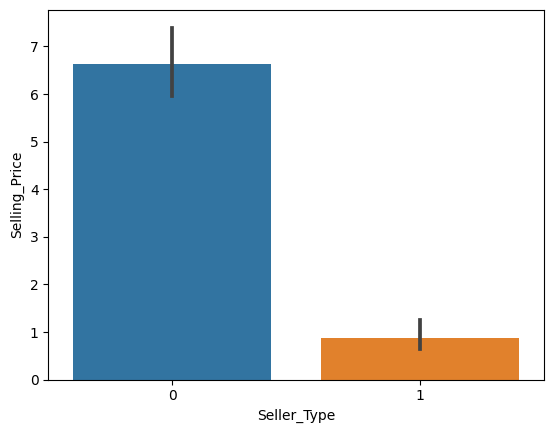

In [18]:
sns.barplot(x='Seller_Type', y='Selling_Price', data=car)

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

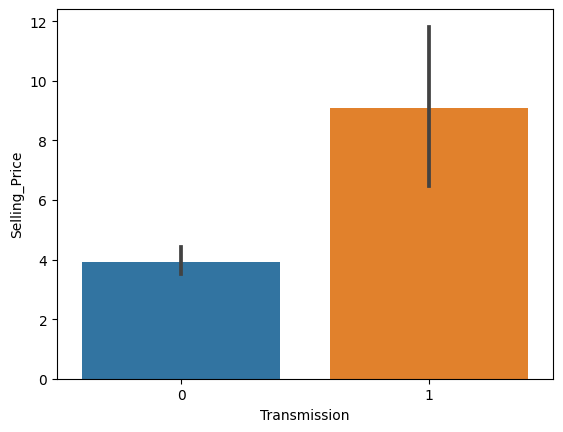

In [19]:
sns.barplot(x='Transmission', y='Selling_Price', data=car)

# Visualizing Continuous column with scatter plot

C:\Users\alikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


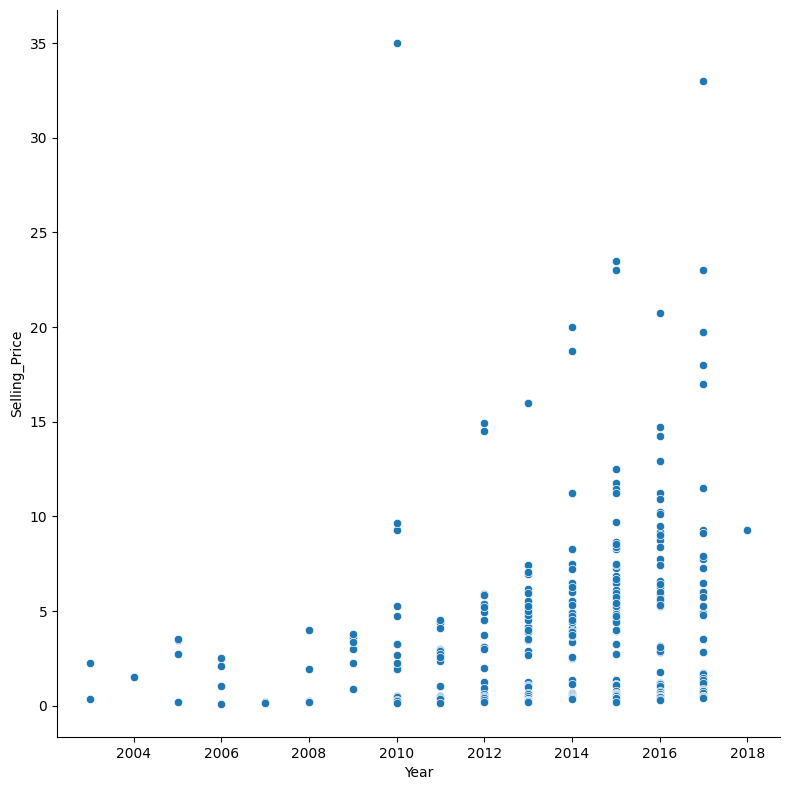

In [20]:
# Let's see how Sales are related with other variables using scatter plot.

sns.pairplot(car, x_vars=['Year'], y_vars='Selling_Price',height=8, aspect=1, kind='scatter')

C:\Users\alikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


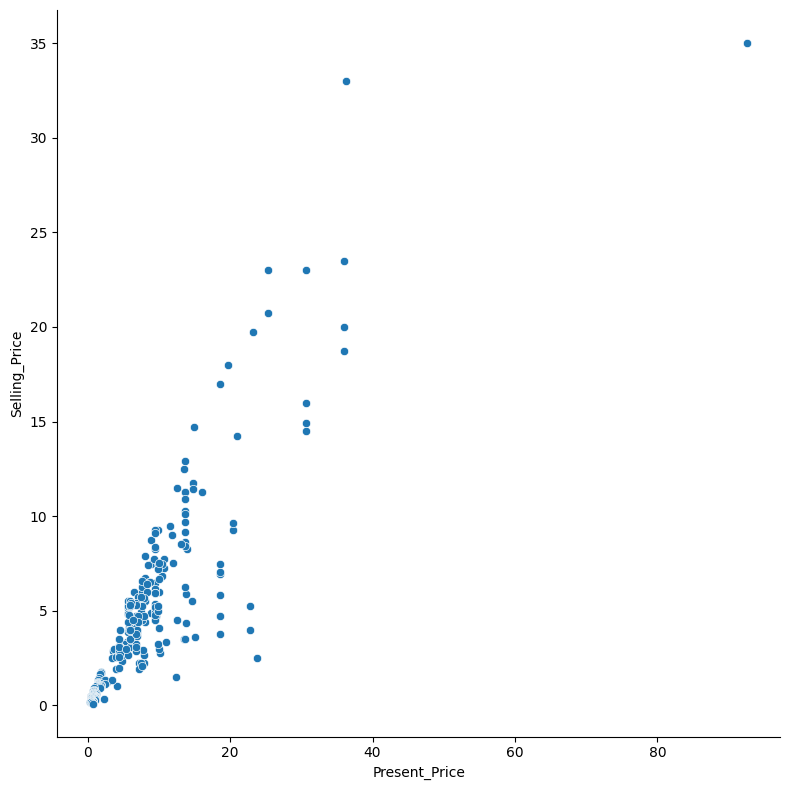

In [21]:
sns.pairplot(car, x_vars=['Present_Price'], y_vars='Selling_Price',height=8, aspect=1, kind='scatter')

C:\Users\alikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


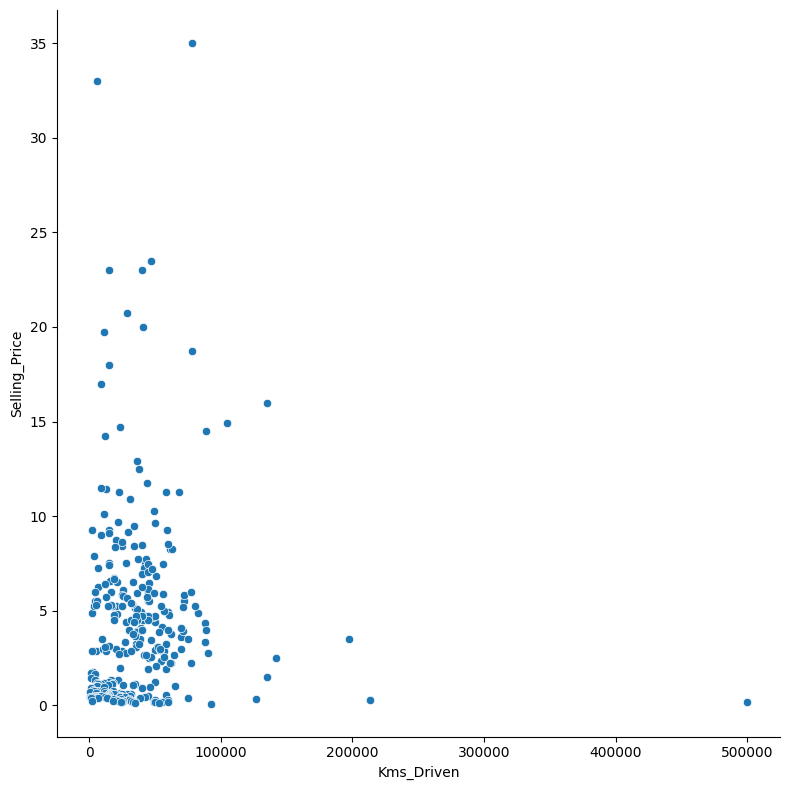

In [22]:
sns.pairplot(car, x_vars=['Kms_Driven'], y_vars='Selling_Price',height=8, aspect=1, kind='scatter')

C:\Users\alikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


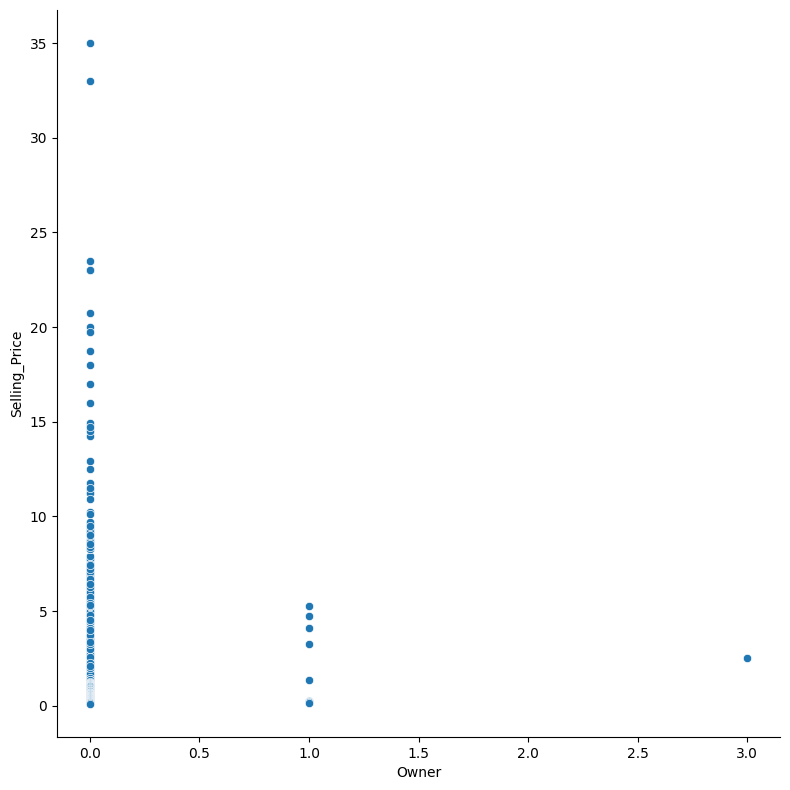

In [23]:
sns.pairplot(car, x_vars=['Owner'], y_vars='Selling_Price',height=8, aspect=1, kind='scatter')

In [24]:
# # Let's see the correlation between different variables.
# plt.figure(figsize=(10,7))
# sns.heatmap(car.corr(), annot = True)

# Model Building

Performing Simple Linear Regression

In [25]:
# Splitting data into Training and testing data

X = car.drop(['Car_Name','Selling_Price'], axis = 1)
Y = car['Selling_Price']

In [26]:
print(X)

           company  Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0    maruti suzuki  2014           5.59       27000          0            0   
1    maruti suzuki  2013           9.54       43000          1            0   
2    maruti suzuki  2017           9.85        6900          0            0   
3    maruti suzuki  2011           4.15        5200          0            0   
4    maruti suzuki  2014           6.87       42450          1            0   
..             ...   ...            ...         ...        ...          ...   
296          honda  2016          11.60       33988          1            0   
297          honda  2015           5.90       60000          0            0   
298          honda  2009          11.00       87934          0            0   
299          honda  2017          12.50        9000          1            0   
300          honda  2016           5.90        5464          0            0   

     Transmission  Owner  
0               0      0

In [27]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64


In [28]:
# Splitting the data and Target

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [29]:
X_train

,company,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
54,other,2005,10.21,90000,0,1,0,0
174,honda,2015,0.72,38600,0,1,0,0
24,maruti suzuki,2013,4.41,56879,0,0,0,0
100,other,2016,1.90,3000,0,1,0,0
246,hyndai,2012,6.79,35000,0,0,0,0
...,...,...,...,...,...,...,...,...
76,toyota,2013,14.68,72000,0,0,0,0
23,maruti suzuki,2014,3.46,45280,0,0,0,0
73,toyota,2011,5.71,43000,0,0,0,0
15,maruti suzuki,2016,10.79,43000,1,0,0,0


Model Training

In [30]:
X_train.drop(columns=['company'], inplace=True)

In [31]:
lin_reg = LinearRegression()

In [32]:
# fit the model to the training data
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [33]:
#Print out the coefficients of the model
print(lin_reg.coef_)

[ 4.05222380e-01  4.44878551e-01 -4.43607219e-06  1.39291917e+00
 -1.03181097e+00  1.34403412e+00  6.18113334e-01]


In [34]:
#Predicton of training data
pred_train = lin_reg.predict(X_train)

# Evaluating the Model with training data

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas

In [35]:
# R^2 Error
error_score = metrics.r2_score(Y_train, pred_train)
print("R squared Error :", error_score)

R squared Error : 0.8830066323340686


In [36]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant.
X.drop(columns=['company'],inplace=True)
X = sm.add_constant(X)
# create a fitted model in one line
lm_8 = sm.OLS(Y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     293.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          6.93e-128
Time:                        11:53:05   Log-Likelihood:                -591.94
No. Observations:                 299   AIC:                             1200.
Df Residuals:                     291   BIC:                             1229.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -811.5837     86.821     -9.348

In [37]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(Y_train, pred_train)))
print('MSE: {}'.format(metrics.mean_squared_error(Y_train, pred_train)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_train, pred_train))))

MAE: 1.1674333150582783
MSE: 3.1127891271139387
RMSE: 1.764309816079347


# Regression plot of the real train values versus        the predicted values.

Text(0, 0.5, 'actual price')

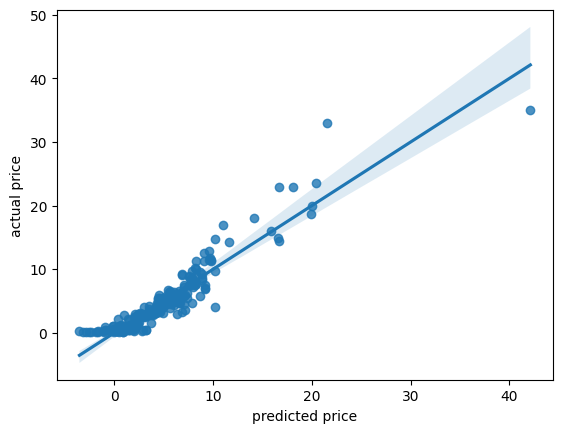

In [38]:
sns.regplot(x=pred_train,y=Y_train)
plt.xlabel("predicted price")
plt.ylabel("actual price")

# Evaluating the Model with Test data

In [39]:
#Predicton of training data
X_test.drop(columns=['company'],inplace=True)
pred_test = lin_reg.predict(X_test)

In [40]:
# R^2 Error
error_score = metrics.r2_score(Y_test, pred_test)
print("R squared Error :", error_score)

R squared Error : 0.7895030781337816


In [41]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(Y_test, pred_test)))
print('MSE: {}'.format(metrics.mean_squared_error(Y_test, pred_test)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_test, pred_test))))

MAE: 1.1951253620342661
MSE: 3.5027447633955306
RMSE: 1.8715621184976818


# Regression plot of the real Test values versus the predicted values.

Text(0, 0.5, 'actual price')

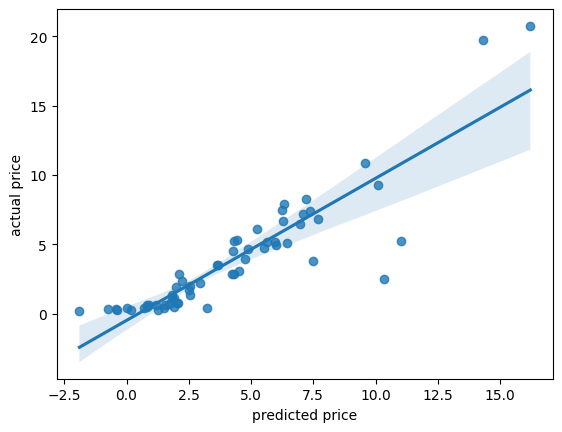

In [42]:
sns.regplot(x=pred_test,y=Y_test)
plt.xlabel("predicted price")
plt.ylabel("actual price")

#  Residuals

 You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

sns.distplot((y_test-pred)) sns.distplot((y_test-pred))

C:\Users\alikh\AppData\Local\Temp\ipykernel_9468\532085755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-pred_test))


<Axes: xlabel='Selling_Price', ylabel='Density'>

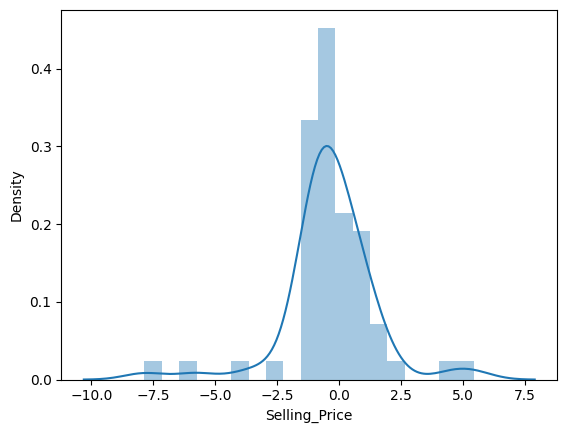

In [43]:
sns.distplot((Y_test-pred_test))

# The residuals are following the normally    distributed with a mean 0. All good!

In [44]:
## I also want to check the residual plot
